In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
warnings.simplefilter(action='ignore',category=UserWarning)

In [2]:
df=pd.read_csv('Downloads/churn_prediction.csv')

In [3]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [4]:
pd.isna(df).sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [5]:
df['gender'].value_counts()

Male      16548
Female    11309
Name: gender, dtype: int64

In [6]:
dgen={'Male':0,'Female':1}
df.replace({'gender':dgen},inplace=True)
df['gender']=df['gender'].fillna(-1)

In [7]:
df['dependents']=df['dependents'].fillna(0)
df['occupation']=df['occupation'].fillna('self-employed')
df['city']=df['city'].fillna(1020)

In [8]:
df['days_since_last_transaction']=df['days_since_last_transaction'].fillna(999)

In [9]:
pd.get_dummies(df['occupation']).head()

,company,retired,salaried,self-employed,self_employed,student
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0


In [11]:
df=pd.get_dummies(df)
df.head()

,customer_id,vintage,age,gender,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,...,previous_month_debit,current_month_balance,previous_month_balance,churn,occupation_company,occupation_retired,occupation_salaried,occupation_self-employed,occupation_self_employed,occupation_student
0,1,3135,66,0.0,0.0,187.0,2,755,224.0,1458.71,...,0.20,1458.71,1458.71,0,0,0,0,0,1,0
1,2,310,35,0.0,0.0,1020.0,2,3214,60.0,5390.37,...,100.56,6496.78,8787.61,0,0,0,0,0,1,0
2,4,2356,31,0.0,0.0,146.0,2,41,999.0,3913.16,...,259.23,5006.28,5070.14,0,0,0,1,0,0,0
3,5,478,90,-1.0,0.0,1020.0,2,582,147.0,2291.91,...,2143.33,2291.91,1669.79,1,0,0,0,0,1,0
4,6,2531,42,0.0,2.0,1494.0,3,388,58.0,927.72,...,1538.06,1157.15,1677.16,1,0,0,0,0,1,0


In [12]:
n_cs=['customer_nw_category','current_balance','previous_month_end_balance','average_monthly_balance_prevQ','average_monthly_balance_prevQ2','current_month_credit','previous_month_credit','current_month_debit','previous_month_debit','current_month_balance','previous_month_balance']
for i in n_cs:
    df[i]=np.log(df[i]+25000)
st=StandardScaler()
scld=st.fit_transform(df[n_cs])
scld=pd.DataFrame(scld,columns=n_cs)

In [13]:
df.head()

,customer_id,vintage,age,gender,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,...,previous_month_debit,current_month_balance,previous_month_balance,churn,occupation_company,occupation_retired,occupation_salaried,occupation_self-employed,occupation_self_employed,occupation_student
0,1,3135,66,0.0,0.0,187.0,10.126711,755,224.0,10.183341,...,10.126639,10.183341,10.183341,0,0,0,0,0,1,0
1,2,310,35,0.0,0.0,1020.0,10.126711,3214,60.0,10.321881,...,10.130645,10.357641,10.427849,0,0,0,0,0,1,0
2,4,2356,31,0.0,0.0,146.0,10.126711,41,999.0,10.272052,...,10.136947,10.309162,10.311288,0,0,0,1,0,0,0
3,5,478,90,-1.0,0.0,1020.0,10.126711,582,147.0,10.214346,...,10.208887,10.214346,10.191287,1,0,0,0,0,1,0
4,6,2531,42,0.0,2.0,1494.0,10.126751,388,58.0,10.163068,...,10.186335,10.171878,10.191563,1,0,0,0,0,1,0


In [14]:
data=df.copy()
df=df.drop(columns=n_cs,axis=1)
df=df.merge(scld,left_index=True,right_index=True,how="left")

In [15]:
y_all=df.churn
df=df.drop('churn',axis=1)

In [16]:
bsln_c=['current_balance','previous_month_end_balance','current_month_debit','previous_month_debit','vintage','occupation_retired','occupation_self-employed','occupation_salaried','occupation_student']
bsln=df[bsln_c]

In [17]:
xtrain,xtest,ytrain,ytest=train_test_split(bsln,y_all,test_size=1/3,random_state=25,stratify=y_all)

In [18]:
model=LogisticRegression()
model.fit(xtrain,ytrain)
pred=model.predict_proba(xtest)[:,1]

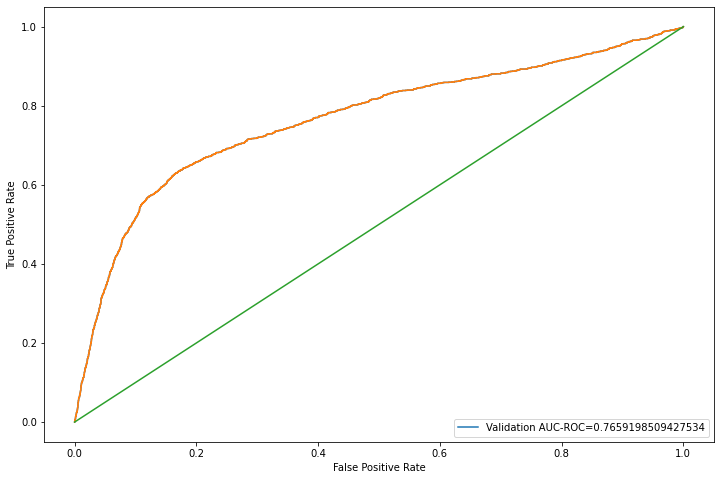

In [19]:
from sklearn.metrics import roc_curve
fpr,tpr,_=roc_curve(ytest,pred)
auc=roc_auc_score(ytest,pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc))
plt.plot(fpr,tpr)
x=np.linspace(0,1,1000)
plt.plot(x,x,linestyle='-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [20]:
pred_val=model.predict(xtest)

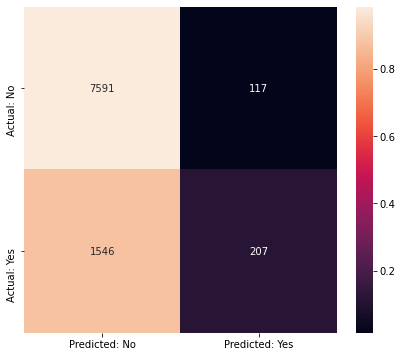

In [21]:
lab_pre=pred_val
cm=confusion_matrix(ytest,lab_pre)
def plot_conf_matr(cm, normalized=True, cmap='bone'):
    plt.figure(figsize=[7,6])
    norm_cm=cm
    if normalized:
        norm_cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        sns.heatmap(norm_cm,annot=cm,fmt='g',xticklabels=['Predicted: No','Predicted: Yes'],yticklabels=['Actual: No','Actual: Yes'])
        
plot_conf_matr(cm,['No','Yes'])

In [22]:
recall_score(ytest,pred_val)

0.11808328579577866

In [23]:
def cv_score(ml_model,rstate=12,thres=0.5,cols=df.columns):
    i=1
    cv_sc=[]
    df1=df.copy()
    df1=df[cols]
    kf=StratifiedKFold(n_splits=5,random_state=rstate,shuffle=True)
    for di,ti in kf.split(df,y_all):
        print('\n{} of kfold{} '.format(i,kf.n_splits))
        xtr,xvl=df1.loc[di],df1.loc[ti]
        ytr,yvl=y_all.loc[di],y_all.loc[ti]
        model=ml_model
        model.fit(xtr,ytr)
        prpr=model.predict_proba(xvl)
        pp=[]
        for j in prpr[:,1]:
            if j>thres:
                pp.append(1)
            else:
                pp.append(0)
        pred_val=pp
        rocc=roc_auc_score(yvl,prpr[:,1])
        rec=np.average(recall_score(yvl,pred_val,average=None))
        prc=np.average(precision_score(yvl,pred_val,average=None))
        suf=""
        msg=""
        msg+="ROC AUC Score: {}, Recall Score: {:.4f}, Precision Score: {:.4f}".format(rocc,rec,prc)
        print("{}".format(msg))
        cv_sc.append(rocc)
        i+=1
    return cv_sc

In [24]:
bslnn=cv_score(LogisticRegression(),cols=bsln_c)


1 of kfold5 
ROC AUC Score: 0.7638133799198438, Recall Score: 0.5445, Precision Score: 0.7165

2 of kfold5 
ROC AUC Score: 0.7814773404583291, Recall Score: 0.5423, Precision Score: 0.7418

3 of kfold5 
ROC AUC Score: 0.7567419777125791, Recall Score: 0.5418, Precision Score: 0.7186

4 of kfold5 
ROC AUC Score: 0.7642170293525596, Recall Score: 0.5466, Precision Score: 0.7449

5 of kfold5 
ROC AUC Score: 0.7643440735721709, Recall Score: 0.5465, Precision Score: 0.7057


In [25]:
alll=cv_score(LogisticRegression())


1 of kfold5 
ROC AUC Score: 0.6885658205734251, Recall Score: 0.5223, Precision Score: 0.6269

2 of kfold5 
ROC AUC Score: 0.6901072859932175, Recall Score: 0.5281, Precision Score: 0.6841

3 of kfold5 
ROC AUC Score: 0.6935570079071665, Recall Score: 0.5285, Precision Score: 0.6541

4 of kfold5 
ROC AUC Score: 0.6820280533371925, Recall Score: 0.5276, Precision Score: 0.6889

5 of kfold5 
ROC AUC Score: 0.6771868051626824, Recall Score: 0.5250, Precision Score: 0.6315


In [26]:
from sklearn.feature_selection import RFE
model=LogisticRegression()
rfe=RFE(estimator=model,n_features_to_select=1,step=1)
rfe.fit(df,y_all)

RFE(estimator=LogisticRegression(), n_features_to_select=1)

In [27]:
rnkg=pd.DataFrame()
rnkg['Feature_Name']=df.columns
rnkg['Rank']=rfe.ranking_

In [28]:
rnkd=rnkg.sort_values(by=['Rank'])
rnkd

,Feature_Name,Rank
15,current_balance,1
17,average_monthly_balance_prevQ,2
8,occupation_company,3
18,average_monthly_balance_prevQ2,4
23,current_month_balance,5
24,previous_month_balance,6
21,current_month_debit,7
12,occupation_self_employed,8
10,occupation_salaried,9
13,occupation_student,10


In [29]:
t10=cv_score(LogisticRegression(),cols=rnkd['Feature_Name'][:10].values,thres=0.15)


1 of kfold5 
ROC AUC Score: 0.7970958791491111, Recall Score: 0.6907, Precision Score: 0.6152

2 of kfold5 
ROC AUC Score: 0.8034510327818312, Recall Score: 0.7018, Precision Score: 0.6219

3 of kfold5 
ROC AUC Score: 0.7969212539634507, Recall Score: 0.6947, Precision Score: 0.6176

4 of kfold5 
ROC AUC Score: 0.7918411297643637, Recall Score: 0.6882, Precision Score: 0.6137

5 of kfold5 
ROC AUC Score: 0.792078977923086, Recall Score: 0.7000, Precision Score: 0.6212


In [30]:
rdf=pd.DataFrame({'bs':bslnn,'all':alll,'top10':t10})

<AxesSubplot:>

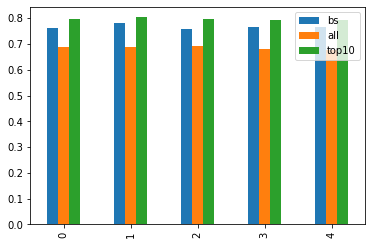

In [31]:
rdf.plot(y=['bs','all','top10'],kind='bar')